# **Projeto Final Python - Análise de crédito**




# ***Introdução***
O crédito é uma ferramenta vital na economia moderna, permitindo o acesso a bens e serviços que, de outra forma, seriam inacessíveis imediatamente. Sua importância é inegável, pois impulsiona o crescimento econômico, viabiliza investimentos e facilita a realização de metas pessoais e empresariais. No entanto, seu uso inadequado ou a inadimplência podem acarretar sérios problemas financeiros.

Contudo, a falta de controle no uso do crédito pode resultar em inadimplência, levando a um ciclo prejudicial. A inadimplência ocorre quando há atraso ou falta de pagamento das dívidas contraídas. Isso gera uma série de consequências negativas, como o aumento de juros, restrição de acesso a novos empréstimos, impacto na pontuação de crédito e, em casos extremos, execuções judiciais ou perda de bens.

Portanto, é crucial manter um equilíbrio saudável no uso do crédito. Isso inclui um planejamento cuidadoso, avaliação realista da capacidade de pagamento, controle de gastos e priorização de dívidas para evitar o acúmulo de compromissos financeiros não gerenciáveis. O crédito é uma ferramenta valiosa, desde que seja usado com responsabilidade e consciência financeira.


# **Objetivos**
Por meio da análise de dados, o objetivo deste projeto é garantir que a empresa fictícia, detentora dos dados, atenda melhor seus clientes, minimizando as perdas e oferecendo melhores produtos e serviços. O estudo visa identificar possíveis relações, causas, semelhanças e comportamentos *de* grupos que possuem potencial de se tornarem inadimplentes.

# **Exploração de dados**
Vamos explorar dados de crédito presentes neste neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de default, que indica se um cliente é adimplente(default = 0), ou inadimplente (default = 1), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |




### **Importação de bibliotecas**

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

### **Leitura dos dados iniciais**

Importação da base de dados contida no link, salvando-a em uma variável chamada 'df' e exibindo as 10 primeiras linhas:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv',
                 na_values=['na', ' ', None, 'NaN', 'na', 'etc', 'nan', 'NA', 'NAN'])
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Podemos contar quantas linhas e colunas existem em nossa base de dados utilizando a seguinte função:

In [3]:
df.shape

(10127, 16)

Podemos verificar se há duplicidades entre os 10.127 clientes, analisando a coluna 'Id'. Um resultado de 0 significa que não há duplicatas, e 1 indica que há duplicidades.

In [4]:
print(df.duplicated('id').sum())

0


Prosseguindo, queremos saber, dentre os 10.127 clientes, quantos são adimplentes e quantos são inadimplentes.

In [5]:
qtd_total,_ = df.shape
qtd_adimplentes,_ = df[df['default'] == 0].shape
qtd_inadimplentes,_ = df[df['default'] == 1].shape
porcent_ad = (qtd_adimplentes/qtd_total)*100
porcent_in = (qtd_inadimplentes/qtd_total)*100
print(f'Dos {qtd_total} clientes presentes na base de dados, {qtd_adimplentes} são clientes adimplentes, representando uma proporção de {porcent_ad:.2f}%,\nenquanto os clientes inadimplentes somam um total de {qtd_inadimplentes}, correspondendo a {porcent_in:.2f}% do total.')

Dos 10127 clientes presentes na base de dados, 8500 são clientes adimplentes, representando uma proporção de 83.93%,
enquanto os clientes inadimplentes somam um total de 1627, correspondendo a 16.07% do total.


### Colunas e seus tipos de dados

In [6]:
print(df.dtypes)

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object


Após analisarmos os dados das colunas e verificarmos a leitura dos dados, identificamos que os dados das colunas ``valor_transacoes_12m`` e ``td_transacoes_12m``são valores numéricos, porém estão gravados como tipo texto (object).

### Atributos categóricos

Atributos categóricos, ou variáveis categóricas, são características de dados que podem ser classificados em categorias discretas e não numéricas. A seguir, faremos a separação e análise desses dados:

In [7]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Podemos extrair algumas informações da tabela acima, como a contagem de linhas preenchidas, o número de registros por tabela, os valores mais frequentes e sua quantidade de ocorrências. Por exemplo, o tipo de cartão mais comum entre os clientes é o 'Blue', com 9.436 de 10.127 registros, o que equivale a 93%.

### Atributos numéricos

Atributos numéricos, também conhecidos como variáveis numéricas ou quantitativas, são características de dados representadas por números e que possuem significado matemático. Faremos a visualização desses dados separadamente.

Observação: como os dados da coluna 'Id' são identificadores pessoais de cada cliente e não são necessários para a análise, iremos removê-los dos atributos numéricos.

In [8]:
df.drop('id', axis = 1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Podemos extrair outros tipos de informações da tabela acima, como a contagem, média, desvio padrão, menor valor, quartis (25%, 50%, 75%) e o valor máximo por coluna. Por exemplo, a média de idade dos clientes é de 46 anos, sendo o cliente mais jovem com 26 anos e o mais velho com 73 anos.

### Dados faltantes

Com o quadro de atributos categóricos, podemos observar que nem todas as colunas possuem a contagem total de 10.127, indicando a presença de valores nulos. Isso pode ocorrer porque o cliente não quis responder, esqueceu, ou por outro motivo. Para realizarmos a análise de forma adequada, é necessário tratar esses dados, evitando a poluição e impacto nas estatísticas. A seguir, vamos verificar com a função abaixo quais variáveis apresentam dados nulos e a quantidade de ocorrências.

In [9]:
df.isna().sum()

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

Como mostrado acima, nas colunas de escolaridade, estado civil e salário anual, há dados faltantes. A função abaixo gera algumas estatísticas sobre as colunas com dados ausentes.

In [10]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    stats_dados_faltantes = []

    for col in df.columns:
        if df[col].isna().any():
            qtd = df[col].isna().sum()
            total = len(df)
            porcentagem = round(100 * qtd / total, 2)
            
            dict_dados_faltantes = {'coluna': col, 'quantidade': qtd,  'porcentagem': porcentagem}
            stats_dados_faltantes.append(dict_dados_faltantes)

    for stat in stats_dados_faltantes:
        print(f"Coluna: {stat['coluna']}, Quantidade de valores : {stat['quantidade']}, Porcentagem: {stat['porcentagem']}%;")

Agora, iremos identificar se esses dados estão relacionados a clientes inadimplentes e adimplentes.

In [11]:
stats_dados_faltantes(df=df)

Coluna: escolaridade, Quantidade de valores : 1519, Porcentagem: 15.0%;
Coluna: estado_civil, Quantidade de valores : 749, Porcentagem: 7.4%;
Coluna: salario_anual, Quantidade de valores : 1112, Porcentagem: 10.98%;


In [12]:
stats_dados_faltantes(df=df[df['default'] == 0])

Coluna: escolaridade, Quantidade de valores : 1263, Porcentagem: 14.86%;
Coluna: estado_civil, Quantidade de valores : 620, Porcentagem: 7.29%;
Coluna: salario_anual, Quantidade de valores : 925, Porcentagem: 10.88%;


In [13]:
stats_dados_faltantes(df=df[df['default'] == 1])

Coluna: escolaridade, Quantidade de valores : 256, Porcentagem: 15.73%;
Coluna: estado_civil, Quantidade de valores : 129, Porcentagem: 7.93%;
Coluna: salario_anual, Quantidade de valores : 187, Porcentagem: 11.49%;


Como as porcentagens praticamente se mantêm, podemos eliminar essas linhas com segurança, sem que isso impacte a análise.

# Transformação e limpeza de dados

Agora que conhecemos melhor a natureza do nosso conjunto de dados, vamos realizar uma atividade conhecida como data wrangling, que consiste na transformação e limpeza dos dados para que possam ser melhor analisados. Em particular, iremos:

- Corrigir os tipos de dados das colunas;
- Remover os dados faltantes;

Na etapa de exploração, notamos que as colunas ``limite_crédito`` e ``valor_transacoes_12m`` estavam sendo interpretadas como colunas categóricas (dtype = object).

In [14]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [15]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Embora os valores aparentem estar corretos, o Python utiliza o formato americano, no qual os centavos são separados por ponto. No entanto, os dados estão separados por vírgula, e por isso estão sendo identificados como texto.

### Transformação de dados

Identificamos que o motivo pelo qual o Python não interpretou os dados da coluna como valores numéricos é porque estão escritos com ponto e vírgula, seguindo o padrão brasileiro, e não o americano, que o Python está programado para reconhecer. Vamos criar uma função lambda para transformá-los em valores numéricos.

In [16]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

In [17]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Agora, com os tipos de dados transformados, podemos utilizar essas duas colunas como atributos numéricos.

In [18]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00













### Remoção dos dados faltantes

Como analisado anteriormente, as porcentagens de colunas com dados faltantes permaneceram praticamente próximas, portanto, podemos eliminá-las sem causar impacto em nossas análises, utilizando a seguinte função:

In [19]:
df.dropna(inplace=True)
df.shape

(7081, 16)

In [20]:
qtd_total_novo,_ = df.shape
reducao = qtd_total - qtd_total_novo
porc_reducao = (reducao/qtd_total)*100
print(f'Com a limpeza dos dados faltantes, a base inicial reduziu de {qtd_total} para {qtd_total_novo} clientes, uma redução de aproximadamente {porc_reducao:.2f}%.')
qtd_adimplentes_novo,_ = df[df['default'] == 0].shape
qtd_inadimplentes_novo,_ = df[df['default'] == 1].shape
porcent_ad_novo = (qtd_adimplentes_novo/qtd_total_novo)*100
porcent_in_novo = (qtd_inadimplentes_novo/qtd_total_novo)*100
print(f'A proporção de clientes adimplentes anteriormente era de {porcent_ad:.2f}%, enquanto a nova proporção é de {porcent_ad_novo:.2f}%.')
print(f'Já a proporção de inadimplentes, que era de {porcent_in:.2f}%, agora é de {porcent_in_novo:.2f}%.')

Com a limpeza dos dados faltantes, a base inicial reduziu de 10127 para 7081 clientes, uma redução de aproximadamente 30.08%.
A proporção de clientes adimplentes anteriormente era de 83.93%, enquanto a nova proporção é de 84.28%.
Já a proporção de inadimplentes, que era de 16.07%, agora é de 15.72%.


# **Visualização de dados**

Os dados estão prontos. Vamos criar diversas visualizações para correlacionar as variáveis explicativas com a variável resposta, a fim de entender quais fatores levam um cliente à inadimplência. Para isso, vamos sempre comparar a base de todos os clientes com as bases de clientes adimplentes e inadimplentes.

In [21]:
df_adimplente = df[df['default'] == 0]
df_adimplente.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24


In [22]:
df_inadimplente = df[df['default'] == 1]
df_inadimplente.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
21,708508758,1,62,F,0,mestrado,casado,menos que $40K,blue,49,2,3,3,1438.73,692.25,16
51,779471883,1,54,F,1,mestrado,casado,menos que $40K,blue,40,2,1,3,1438.08,705.59,19
54,714374133,1,56,M,2,mestrado,casado,$120K +,blue,36,1,3,3,15769.34,602.60,15
61,712030833,1,48,M,2,mestrado,casado,$60K - $80K,silver,35,2,4,4,34516.60,691.10,15
127,720201033,1,53,M,2,mestrado,casado,$80K - $120K,blue,41,3,2,3,11669.07,720.82,23


### Visualizações Categóricas

Nesta seção, vamos visualizar a relação entre a variável resposta **inadimplente** com os atributos categóricos. Como a variável ``sexo`` faz parte dos Dados Sensíveis, de acordo com a LGPD, não a utilizaremos em nossa análise.

In [23]:
df.drop('sexo', axis=1).select_dtypes('object').head(n=5)

,escolaridade,estado_civil,salario_anual,tipo_cartao
0,ensino medio,casado,$60K - $80K,blue
1,mestrado,solteiro,menos que $40K,blue
2,mestrado,casado,$80K - $120K,blue
4,sem educacao formal,casado,$60K - $80K,blue
5,mestrado,casado,$40K - $60K,blue


Estou criando uma função para comparar os gráficos dos dataframes de todos os clientes, dos clientes adimplentes e dos inadimplentes, de forma que possamos compará-los e analisá-los.

In [24]:
def grafico_comparativo_vc(coluna: str):
    titulos = [f'{coluna.replace("_", " ").title()} dos Clientes',
               f'{coluna.replace("_", " ").title()} dos Clientes Adimplentes',
               f'{coluna.replace("_", " ").title()} dos Clientes Inadimplentes']
    eixo = 0
    max_y = 0
    figura, eixos = plt.subplots(1, 3, figsize=(20, 10), sharex=True)
    
    for dataframe in [df, df_adimplente, df_inadimplente]:
        df_to_plot = dataframe[coluna].value_counts().reset_index()
        df_to_plot.columns = [coluna, 'frequencia_absoluta']
        df_to_plot.sort_values(by=[coluna], inplace=True)
        
        num_categorias = df_to_plot[coluna].nunique()
        paleta_cores = sns.color_palette("dark", num_categorias)
        
        f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo], palette=paleta_cores)
        f.set(title=titulos[eixo], xlabel=coluna.replace("_", " ").capitalize(), ylabel='Frequência Absoluta')
        f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))
        eixo += 1

    plt.tight_layout()
    plt.show()
    if not os.path.exists('./output'):
        os.makedirs('./output')
    
    figura.savefig(f'./output/{coluna}.jpg')

 - Estado civil

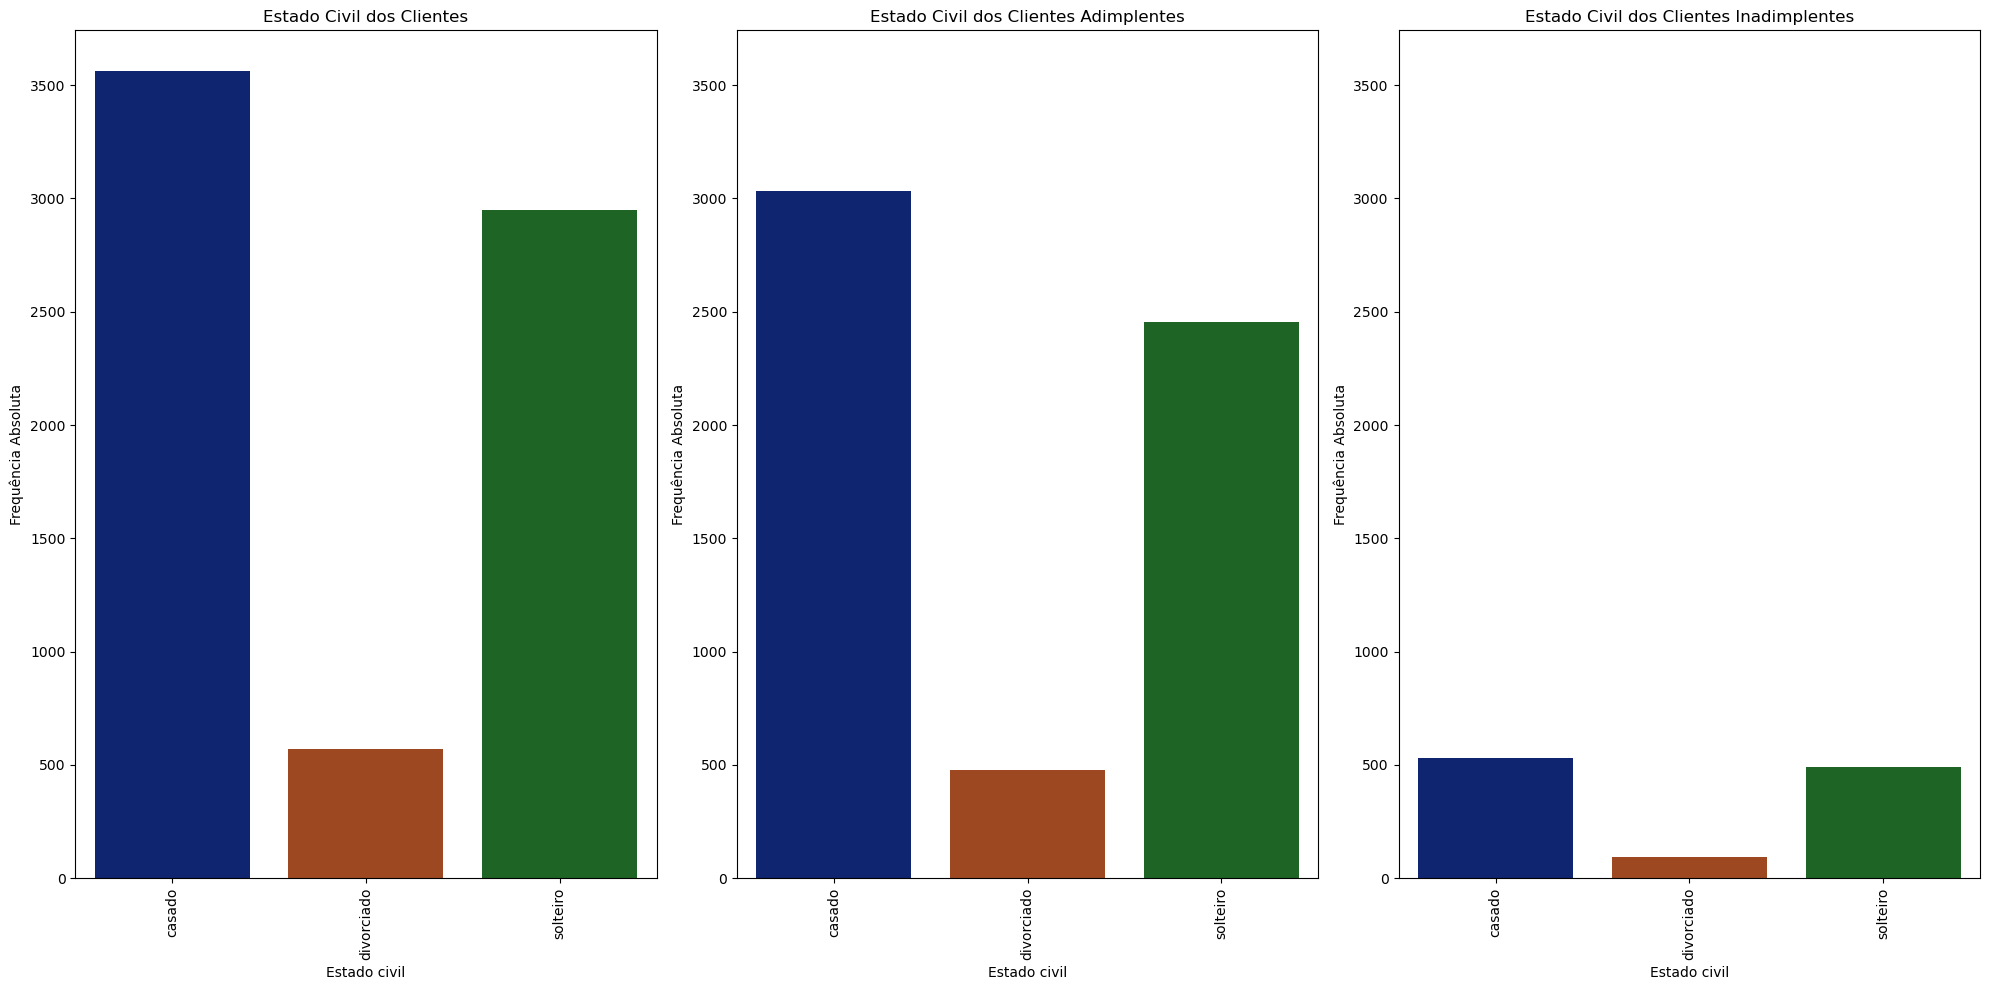

In [25]:
grafico_comparativo_vc('estado_civil')

Nos gráficos comparativos sobre o estado civil dos clientes, observamos que, ao contrário dos gráficos de todos os clientes e dos clientes adimplentes, onde a maioria dos clientes era casada, no gráfico dos clientes inadimplentes, esse número praticamente se iguala ao de clientes solteiros.

- Escolaridade

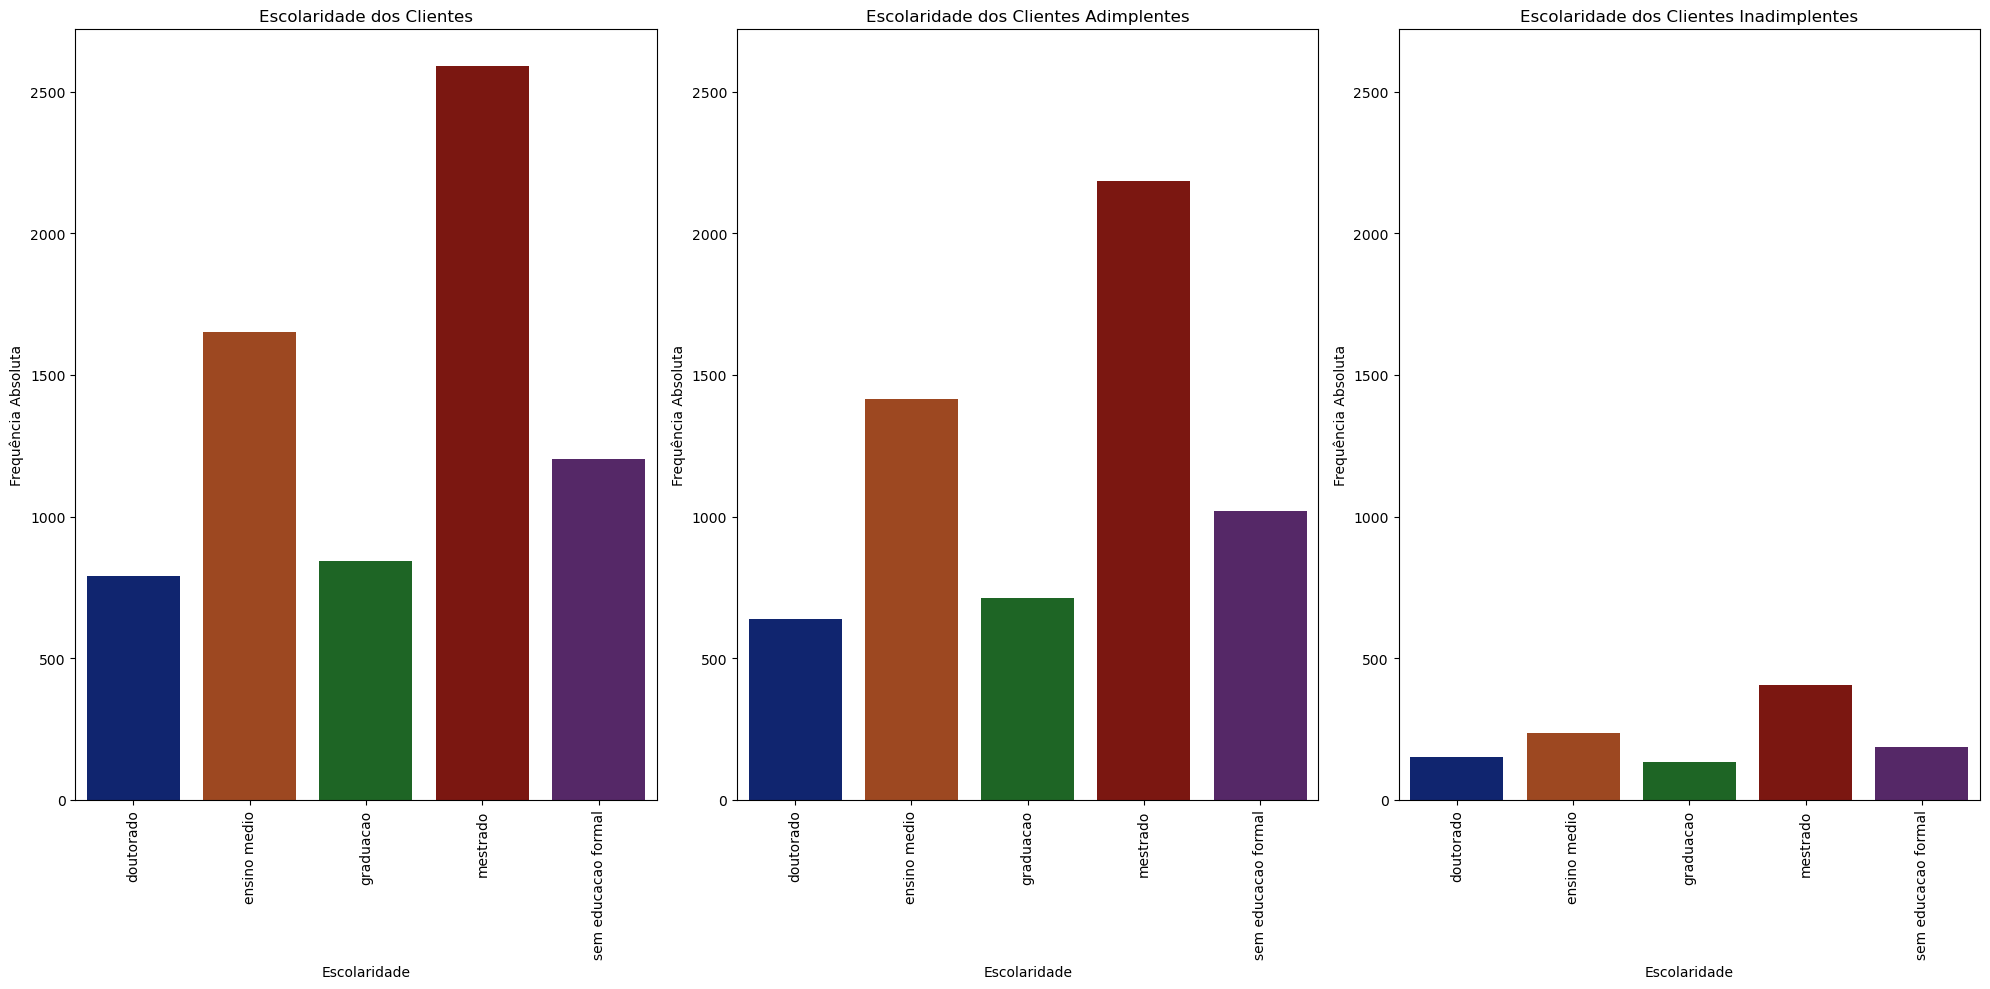

In [26]:
grafico_comparativo_vc('escolaridade')

Nos gráficos comparativos que representa a ``escolaridade`` dos clientes, não é evidente uma variação na distribuição nos três gráficos.

- Salário Anual

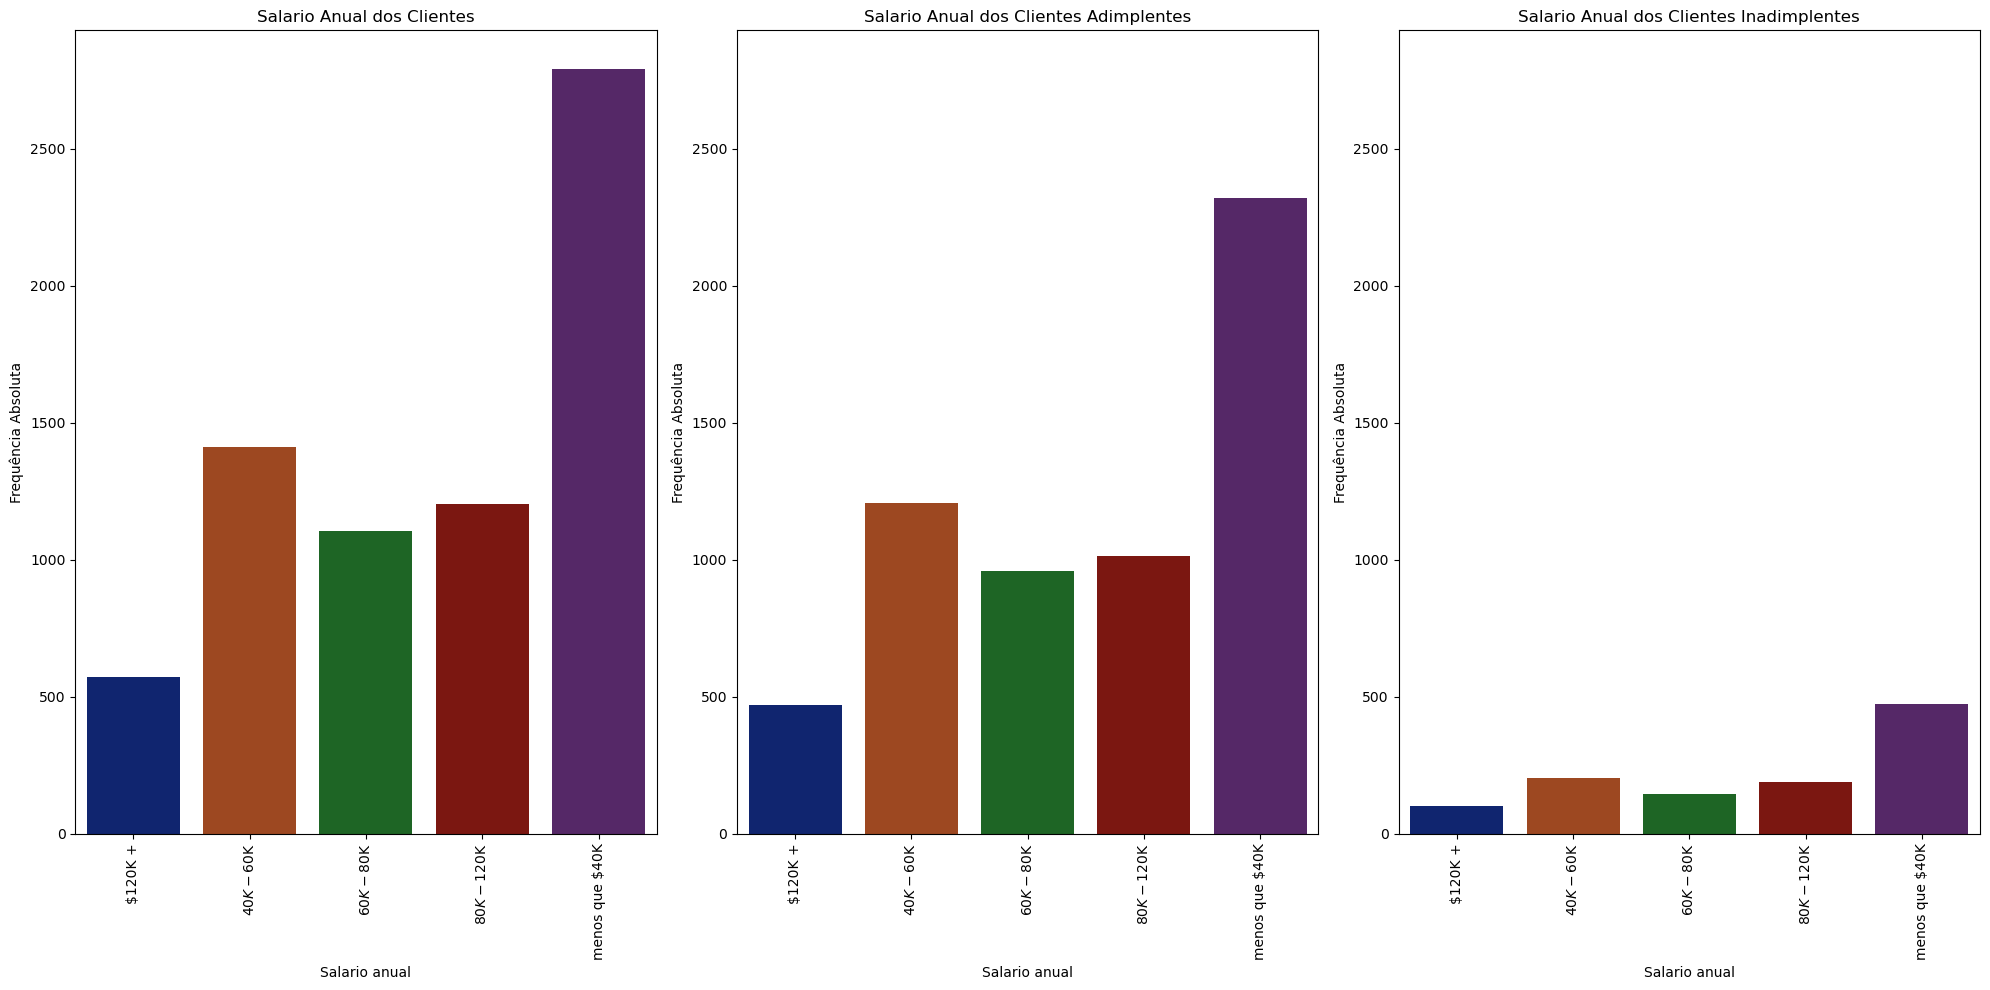

In [27]:
grafico_comparativo_vc('salario_anual')

Nos gráficos comparativos que representa o sálario anual dos clientes, não é evidente uma variação na distribuição nos três gráficos.

- Tipo de cartão

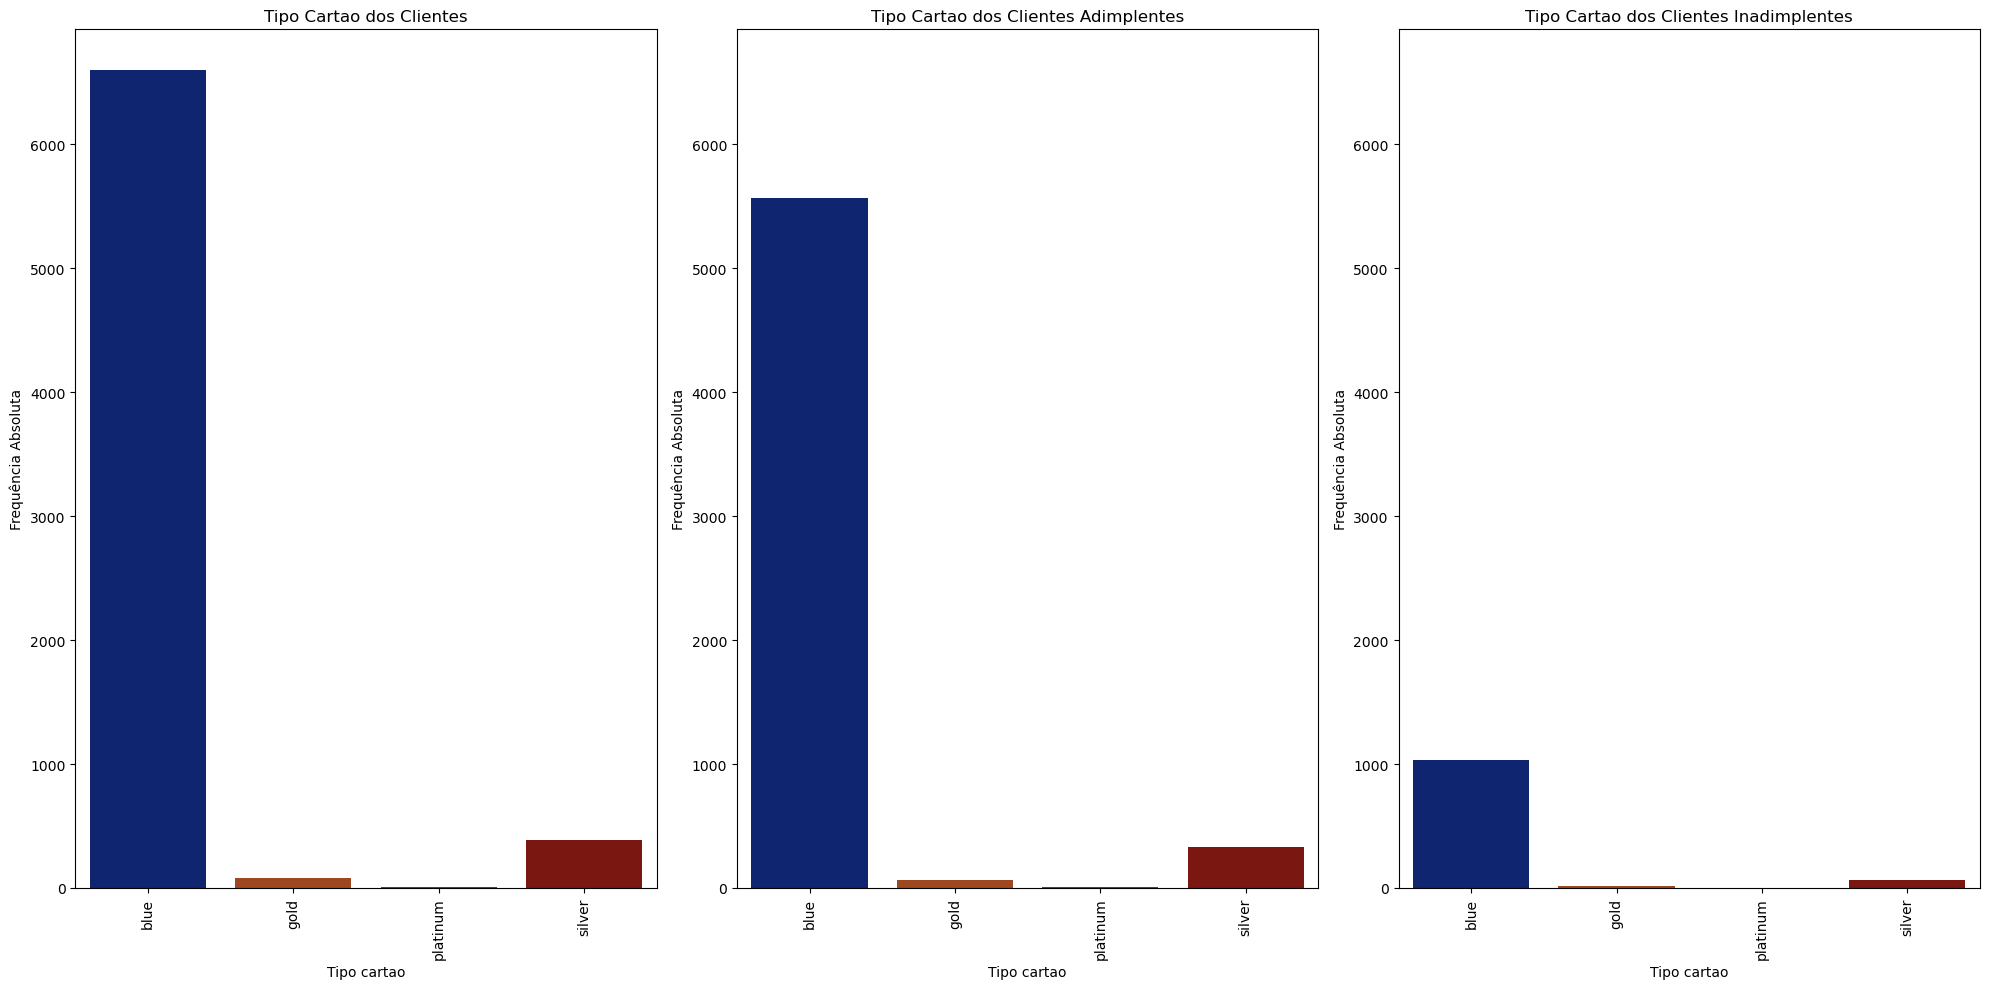

In [28]:
grafico_comparativo_vc('tipo_cartao')

Nos gráficos comparativos que representa o tipo de cartão, não é evidente uma variação na distribuição nos três gráficos.

### Visualizações Númericas

Nesta seção, vamos visualizar a relação entre a variável resposta **Inadimplente** com os atributos numéricos.

In [29]:
# Removendo as variaveis id e defaut das visualizações númericas
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


In [30]:
def grafico_comparativo_vn(coluna: str):
    coluna = coluna
    titulos = [f'Qtd. de {coluna.replace("_", " ").title()}',
               f'Qtd. de {coluna.replace("_", " ").title()} de Adimplentes',
               f'Qtd. de {coluna.replace("_", " ").title()} de Inadimplentes']

    eixo = 0
    max_y = 0
    figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

    for dataframe in [df, df_adimplente, df_inadimplente]:
        f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
        f.set(title=titulos[eixo], xlabel=coluna.replace("_", " ").capitalize(), ylabel='Frequência Absoluta')

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))

        eixo += 1

    plt.tight_layout()
    figura.savefig(f'./output/{coluna}.jpg')
    plt.show()

- Idade

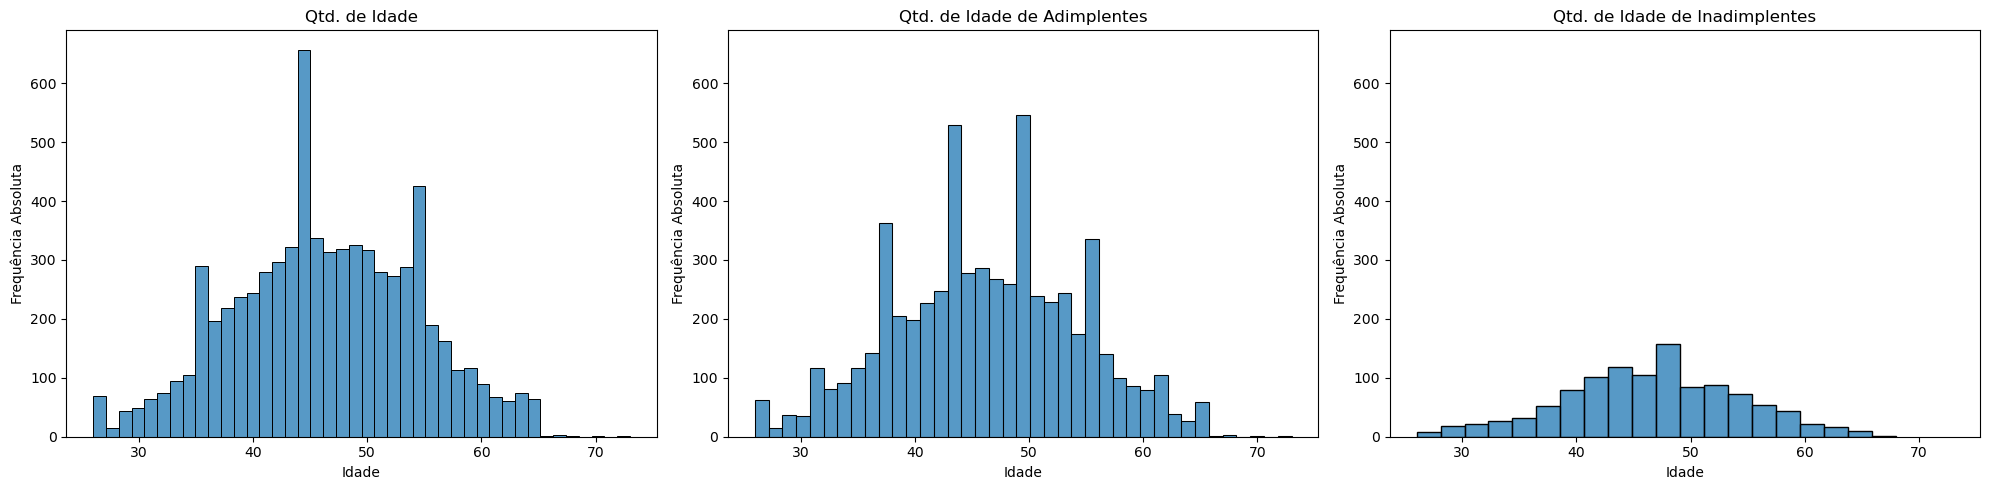

In [31]:
grafico_comparativo_vn('idade')

Nos gráficos comparativos que representa a idade, não é evidente uma variação na distribuição nos três gráficos.

- Dependentes

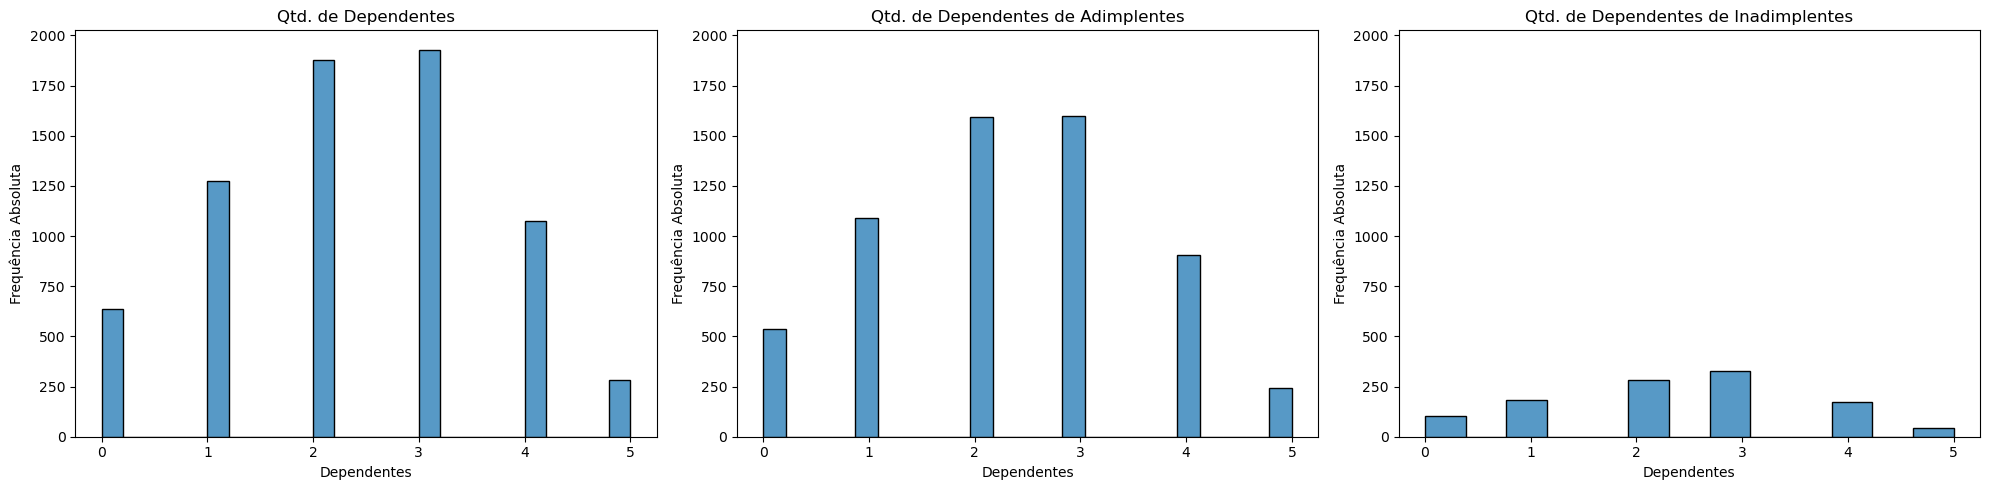

In [32]:
grafico_comparativo_vn('dependentes')

Nos gráficos comparativos que representa a quantidade de dependentes, não é evidente uma variação na distribuição nos três gráficos.

- Meses de Relacionamento

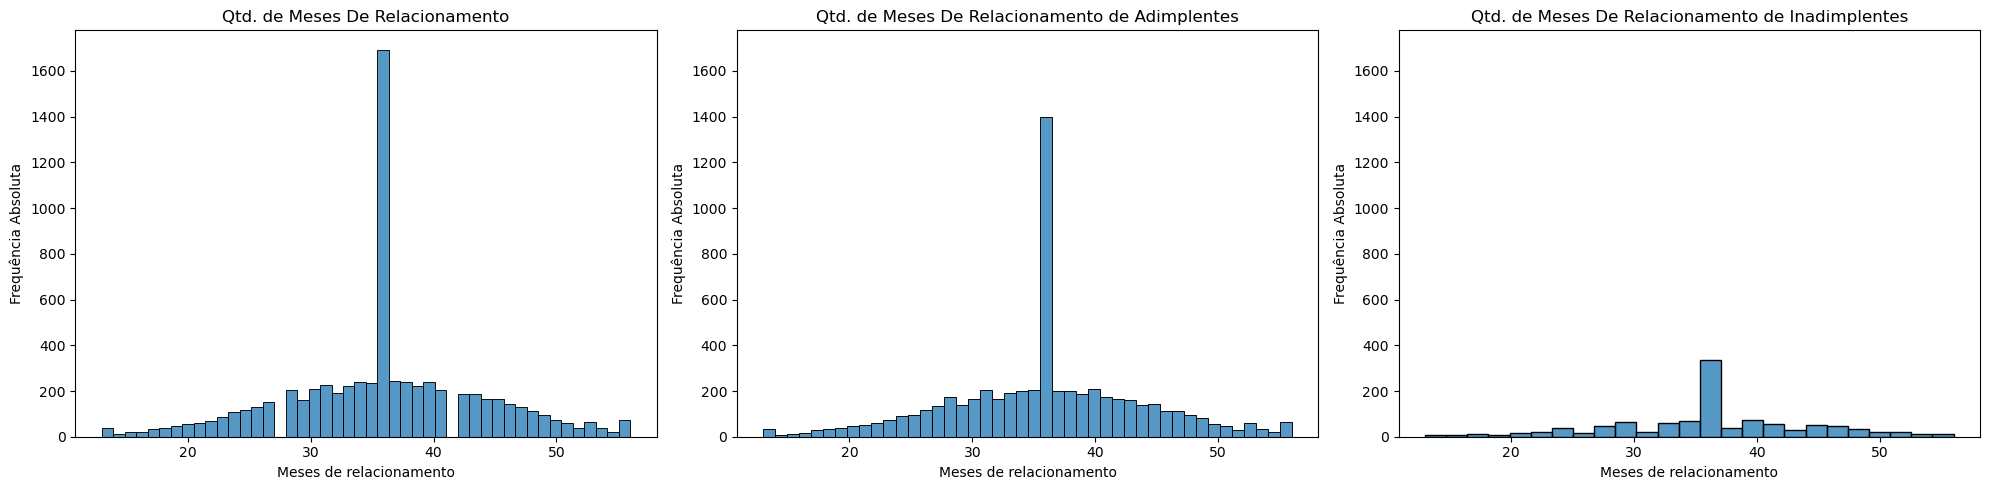

In [33]:
grafico_comparativo_vn('meses_de_relacionamento')

Nos gráficos comparativos que representa os meses de relacionamento dos clientes, não é evidente uma variação na distribuição nos três gráficos.

- Quantidade de produtos

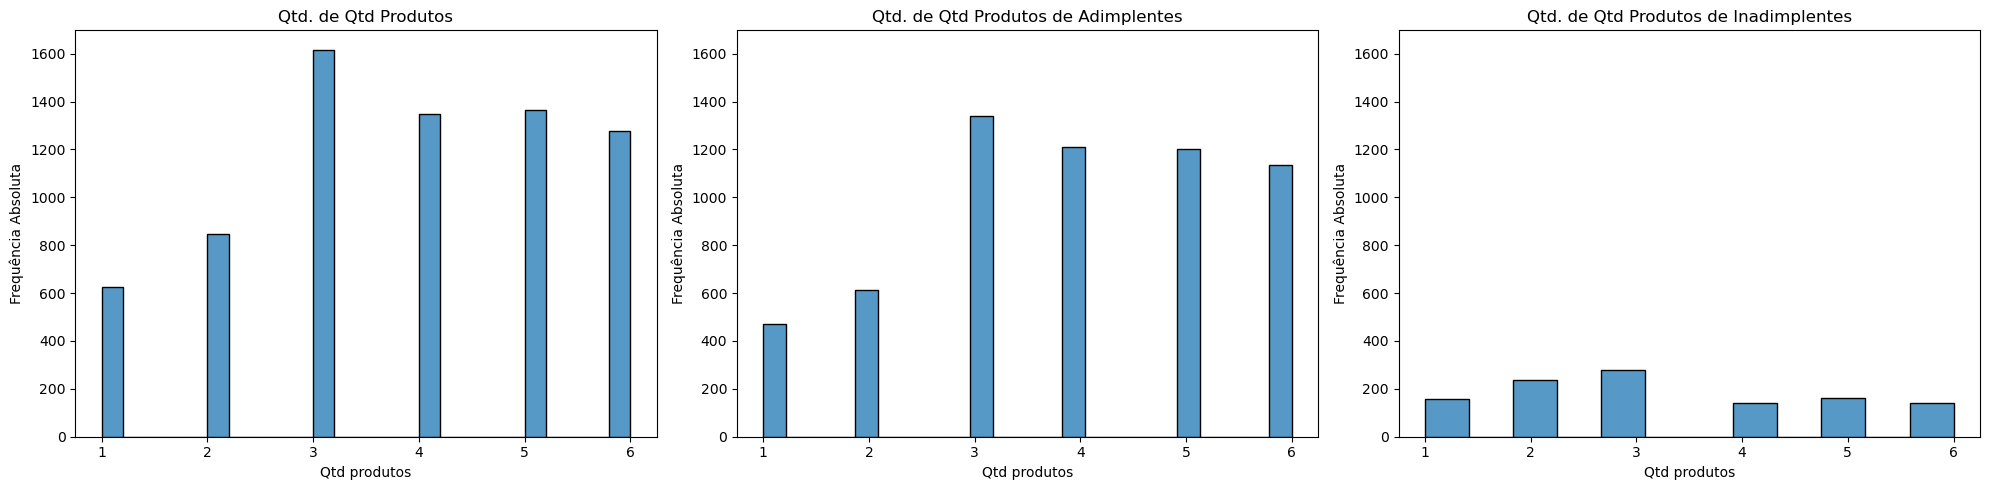

In [34]:
grafico_comparativo_vn('qtd_produtos')

Analisando os gráficos, percebemos que os clientes inadimplentes geralmente possuem entre 2 e 3 produtos, ao contrário dos clientes adimplentes e do conjunto geral de clientes, nos quais é evidente a tendência de ter entre 3 e 6 produtos.

- Interações nos últimos 12 meses

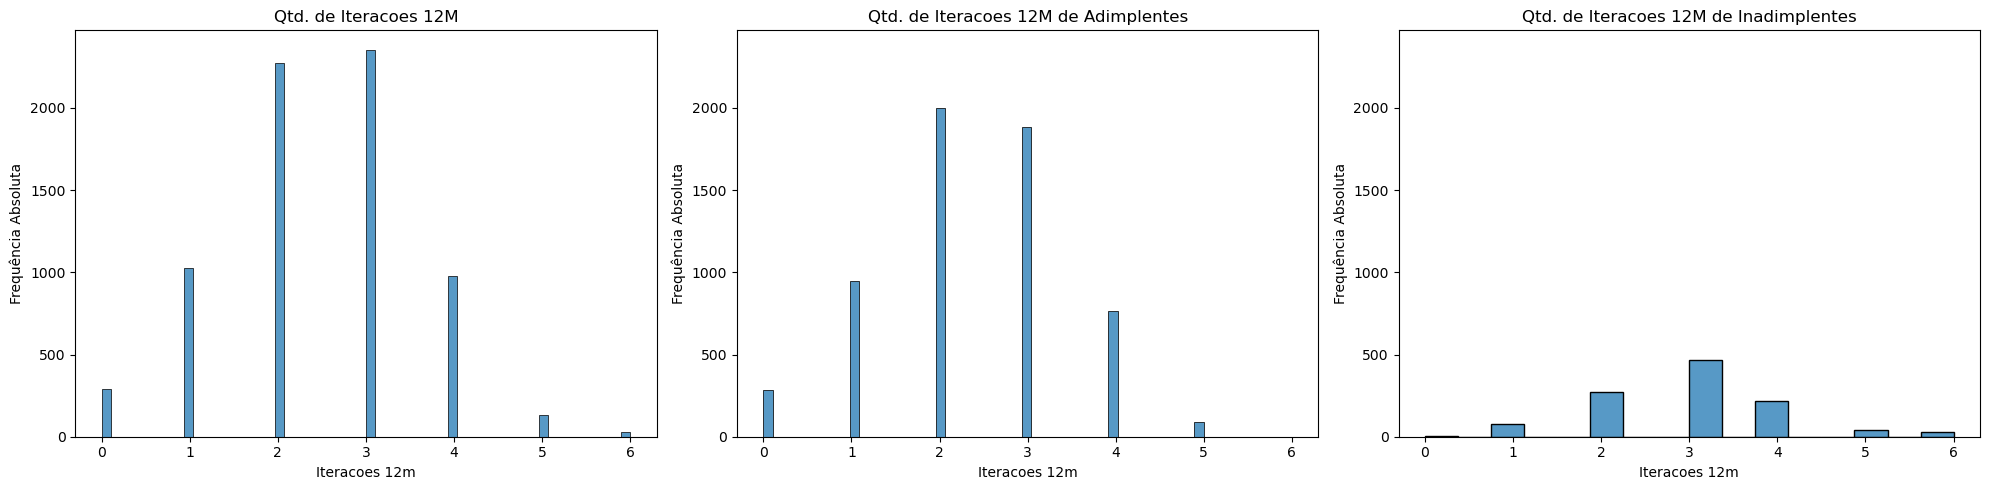

In [35]:
grafico_comparativo_vn('iteracoes_12m')

O número de iterações também pode estar ligado com a inadimplência, sendo que entre os inadimplentes, boa parte deles tiveram 3 iterações nos últimos 12 meses.


- Quantidade de meses inativos no último ano

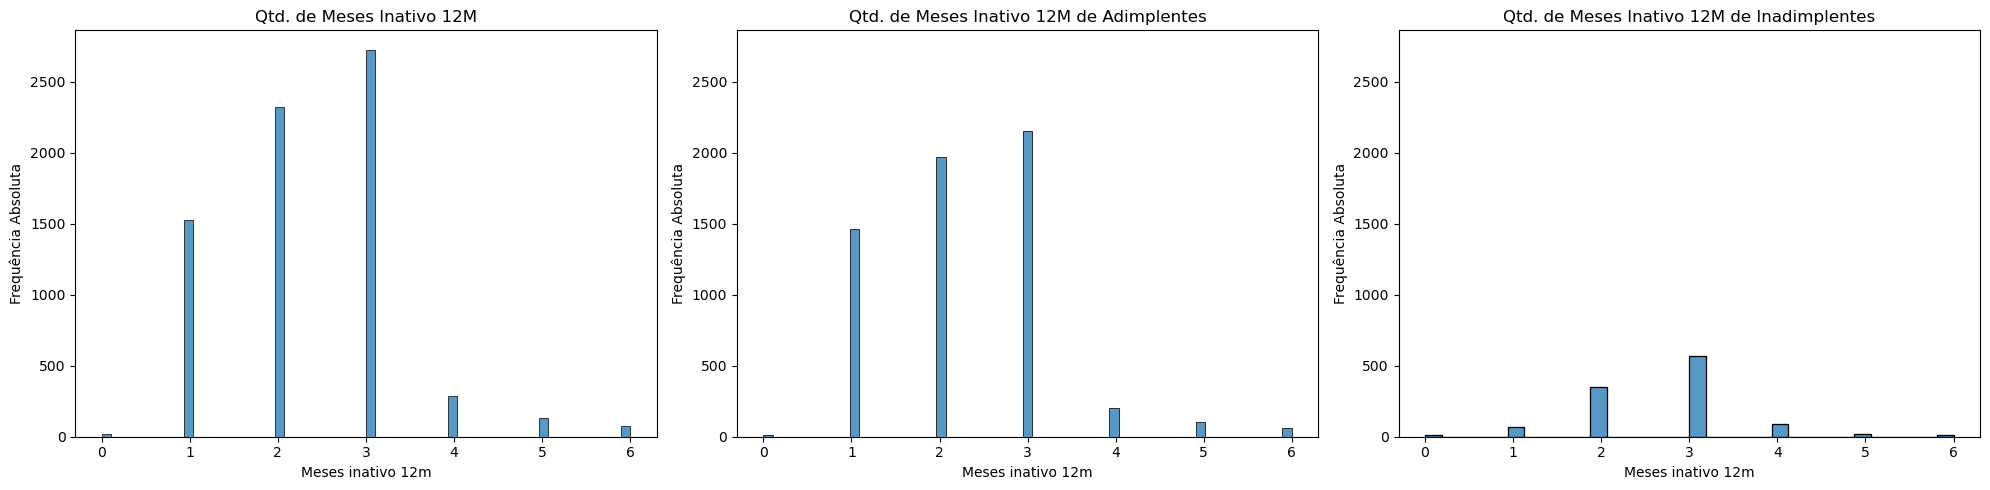

In [36]:
grafico_comparativo_vn('meses_inativo_12m')

Nos gráficos comparativos que representam a quantidade de meses inativos nos últimos 12 meses, a distribuição é similar entre os grupos, exceto no gráfico dos inadimplentes, onde a quantidade de clientes com 4 meses inativos é proporcionalmente maior em relação aos outros dois grupos.

- Quantidade de Limite de crédito

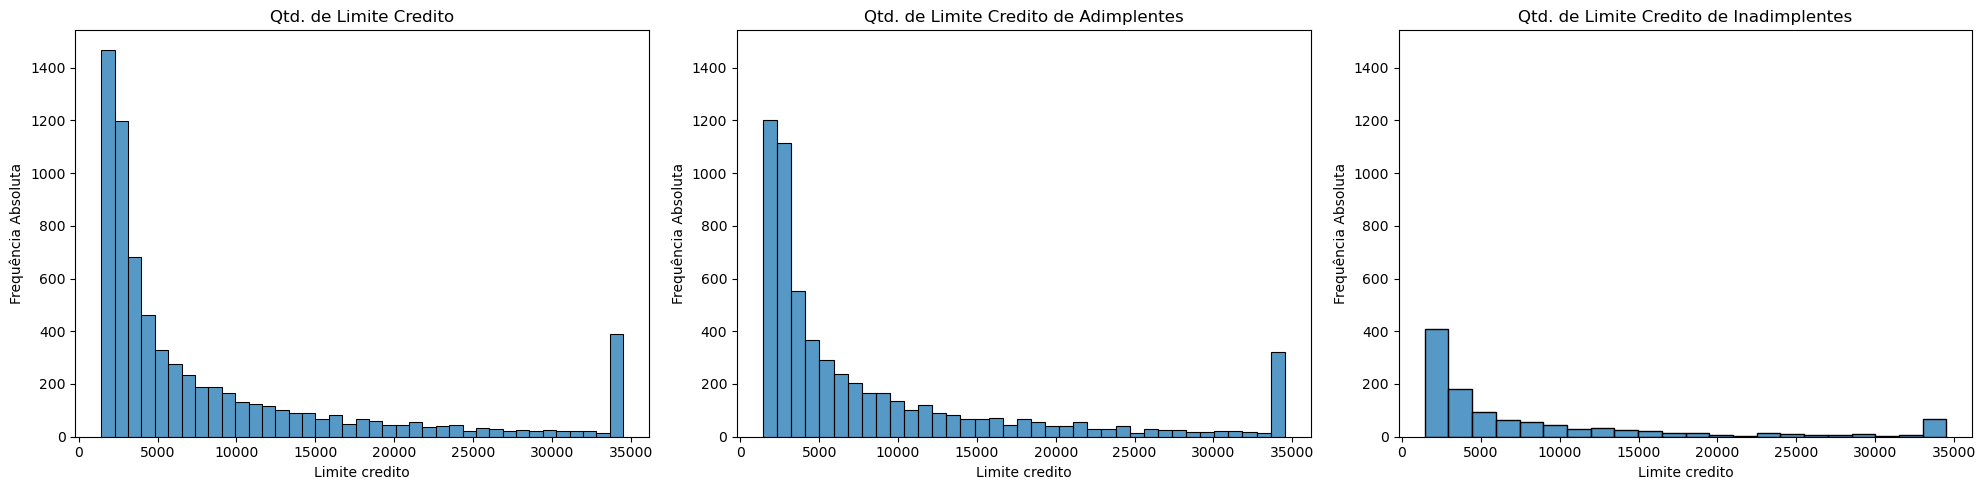

In [37]:
grafico_comparativo_vn('limite_credito')

Nos gráficos comparativos que representa o limite de crédito, não é evidente uma variação na distribuição nos três gráficos.

- Valores das transações nos últimos 12 meses

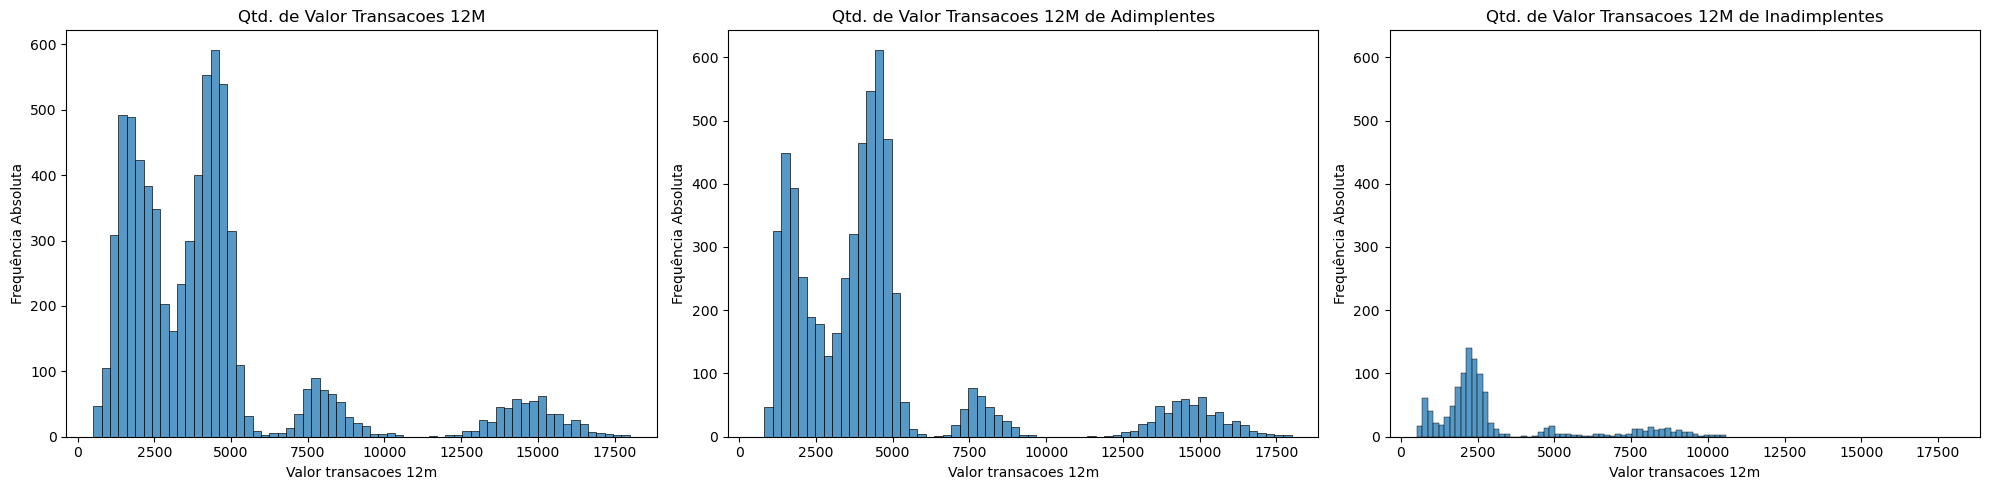

In [38]:
grafico_comparativo_vn('valor_transacoes_12m')

Os clientes inadimplentes demonstram um padrão de gastos com uma média de despesas em torno de R$ 2.500,00 nos últimos 12 meses, sem ultrapassar valores superiores a RS 10.000,00 no mesmo período.

- Quantidade de transações nos últimos 12 meses

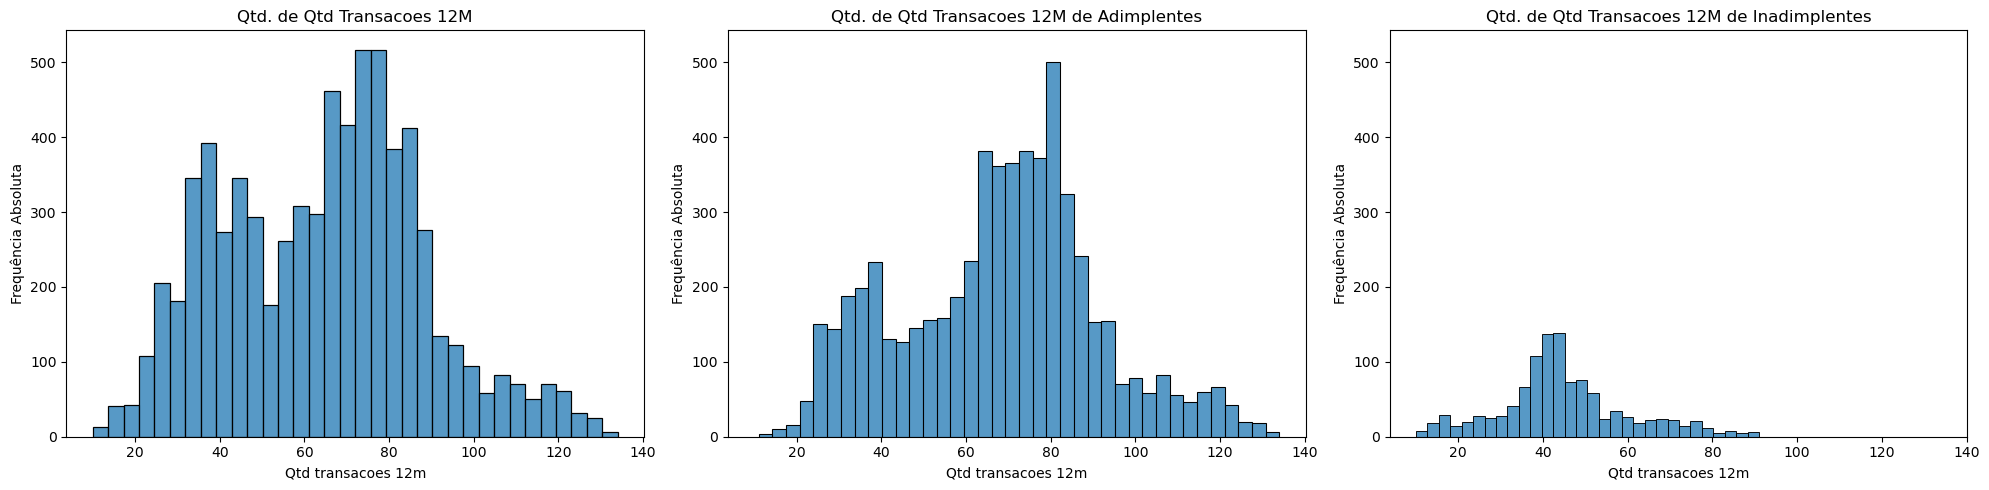

In [39]:
grafico_comparativo_vn('qtd_transacoes_12m')

Os clientes inadimplentes realizaram entre 20 e 60 transações nos últimos 12 meses.

### Análise Descritiva Bivariada

Nesta seção, vamos visualizar a relação entre duas variáveis categóricas.

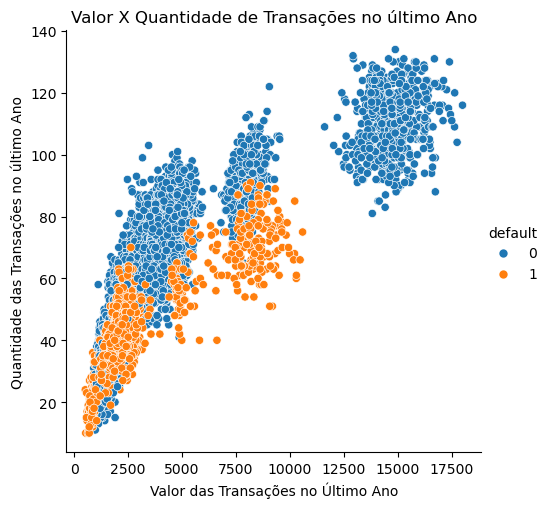

In [40]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Valor X Quantidade de Transações no último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no último Ano'
  )
f.savefig(f'./output/Valor X Quantidade de Transações no último Ano.jpg')
plt.show()

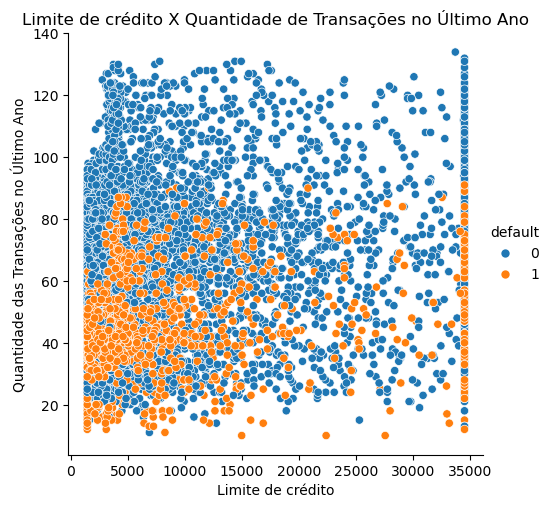

In [41]:
f = sns.relplot(x='limite_credito', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Limite de crédito X Quantidade de Transações no Último Ano',
    xlabel='Limite de crédito',
    ylabel='Quantidade das Transações no Último Ano'
  )
f.savefig(f'./output/Limite de crédito X Quantidade de Transações no Último Ano.jpg')
plt.show()

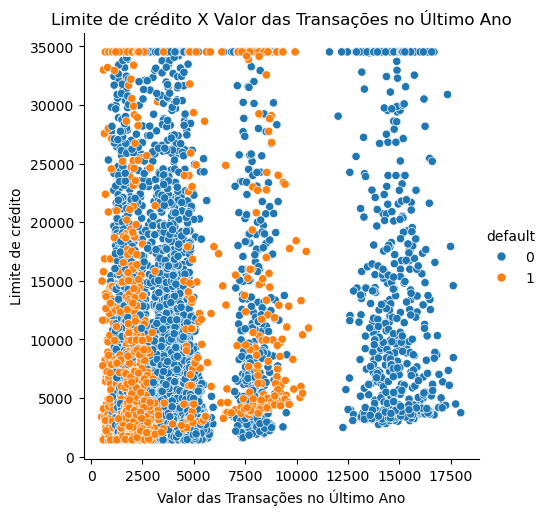

In [42]:
f = sns.relplot(x='valor_transacoes_12m', y='limite_credito', data=df, hue='default')
_ = f.set(
    title='Limite de crédito X Valor das Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Limite de crédito'
  )
f.savefig(f'./output/Limite de crédito X Valor das Transações no Último Ano.jpg')
plt.show()

# **insights gerados**

Conclusões de nossa analise:

- É perceptível que os clientes inadimplentes praticamente não possuem cartões do tipo 'gold'.
- Clientes inadimplentes geralmente possuem entre 2 e 3 produtos, enquanto a média dos clientes adimplentes varia de 3 a 6 produtos.
- Os clientes inadimplentes demonstram um padrão de gastos, com uma média de despesas em torno de RS 2.500,00 nos últimos 12 meses, sem ultrapassar valores superiores a RS 10.000,00 no mesmo período.
- Clientes que realizam entre 30 e 60 transações nos últimos 12 meses têm maior probabilidade de se tornarem inadimplentes.
- Clientes que realizam mais transações e com valores elevados geralmente não apresentam inadimplência. Em contrapartida, aqueles que realizam transações de valores baixos e em menor quantidade tendem a se tornar inadimplentes.
- No gráfico de 'Valores X Quantidade de Transações no Último Ano', há uma clara separação de grupos de transações para diferentes faixas de valores, indicando perfis distintos de clientes.
- Transações com valores acima de RS 10.000,00 praticamente não incluem clientes inadimplentes.
- Clientes com limites de crédito mais elevados, acima de RS 20.000,00, tendem a ser adimplentes.